# Fit LIF model to BBP data

### Load modules

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle

from Experiment import Experiment
from LIF import LIF
from Filter_Rect_LogSpaced import Filter_Rect_LogSpaced
import bluebrain_data_io as bbp_io

plt.style.use('ggplot')
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.facecolor'] = 'white'

### Load experiments

In [9]:
vip_expms = bbp_io.get_vip_expms(merged=True, verbose=False)

In [10]:
len(vip_expms)

12

### Plots of single spikes

In [11]:
'''
for expm in expms:
    tr = expm.trainingset_traces[0]
    plt.figure(figsize=(12,12))
    for i in range(tr.getSpikeNb()):
        plt.plot(tr.spike_waveforms[i,:], label='V')
        spike_diff = np.diff(tr.spike_waveforms[i,:])
        plt.plot(tr.relative_threshold_times[i], tr.threshold_values[i],'*r')
        plt.plot(tr.relative_peak_times[i], tr.spike_waveforms[i,tr.relative_peak_times[i]], 'ob')
        plt.title(expm.name)
plt.show()
'''

"\nfor expm in expms:\n    tr = expm.trainingset_traces[0]\n    plt.figure(figsize=(12,12))\n    for i in range(tr.getSpikeNb()):\n        plt.plot(tr.spike_waveforms[i,:], label='V')\n        spike_diff = np.diff(tr.spike_waveforms[i,:])\n        plt.plot(tr.relative_threshold_times[i], tr.threshold_values[i],'*r')\n        plt.plot(tr.relative_peak_times[i], tr.spike_waveforms[i,tr.relative_peak_times[i]], 'ob')\n        plt.title(expm.name)\nplt.show()\n"

### Fit models

In [12]:
lifs = []
for expm in vip_expms:
    # Create a new object GIF 
    myLIF = LIF(expm.dt)
    # Define parameters
    myLIF.Tref = 5.0  
    # detect Spikes
    expm.detectSpikes_cython(verbose=False)
    # Perform the fit
    myLIF.fit(expm, DT_beforeSpike=5.0)
    lifs.append(myLIF)

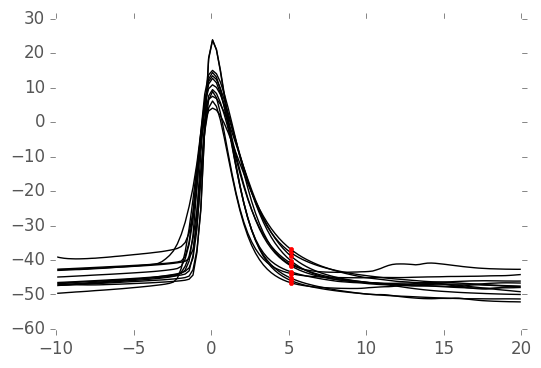

In [13]:
plt.figure()
for a in lifs:    
    if a.fitted:
        plt.plot(a.avg_spike_shape_support, a.avg_spike_shape, 'black')
        Tref_ind = np.where(a.avg_spike_shape_support >= a.Tref)[0][0]
        plt.plot([a.avg_spike_shape_support[Tref_ind]], [a.Vr], '.', color='red')
plt.show()

In [14]:
params_dict = {}
params_dict['tau (ms)'] = np.array([lif.C/lif.gl for lif in lifs])
params_dict['R (MOhm)'] = np.array([1/lif.gl for lif in lifs])
params_dict['C (nF)'] = np.array([lif.C for lif in lifs])
params_dict['El (mV)'] = np.array([lif.El for lif in lifs])
params_dict['Vr (mV)'] = np.array([lif.Vr for lif in lifs])
params_dict['Vt (mV)'] = np.array([lif.Vt for lif in lifs])

import pandas as pd
df = pd.DataFrame(params_dict)

In [15]:
df.describe(percentiles=[])

,C (nF),El (mV),R (MOhm),Vr (mV),Vt (mV),tau (ms)
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.441599,-62.216311,219.557184,-41.888619,-42.776115,87.056778
std,0.236307,4.307073,104.050884,3.185645,2.875921,51.313419
min,0.106811,-68.160750,91.154189,-46.586267,-46.581060,28.747003
50%,0.450107,-62.637123,213.947001,-41.498489,-43.605070,71.557733
max,0.919976,-54.340959,434.989757,-36.870459,-36.343539,203.024942


In [17]:
df

,C (nF),El (mV),R (MOhm),Vr (mV),Vt (mV),tau (ms)
0,0.466735,-56.419532,434.989757,-43.928559,-40.419433,203.024942
1,0.130395,-64.967275,220.461123,-37.820292,-43.926789,28.747003
2,0.260167,-54.340959,276.781865,-46.586267,-44.453188,72.009422
3,0.475335,-59.362437,314.024277,-40.894423,-43.283351,149.266606
4,0.537335,-63.292584,207.432879,-45.935453,-44.157567,111.461022
5,0.759592,-68.160750,147.860365,-45.236589,-44.950046,112.313605
6,0.523858,-61.981663,135.735265,-41.660715,-42.336429,71.106044
7,0.433480,-68.125481,139.683947,-40.165092,-40.710783,60.550158
8,0.106811,-65.474548,331.360293,-36.870459,-46.581060,35.392930
9,0.393396,-61.819962,91.154189,-38.815814,-40.438938,35.859699
